In [ ]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
taxiData = pd.read_csv('TaxiWeatherStation_50000_demo.csv')
taxiData.head()
taxiData = taxiData.drop(taxiData.columns[[0,1,2,3,4,5,10,11,12,13,14,15,16,17,18]],axis=1)
taxiData.head()

# Total Amount vs Trip Distance

In [ ]:
regrA = linear_model.LinearRegression(fit_intercept=False)
#X_taxiData = taxiData[['trip_distance']].values
#Y_taxiData = taxiData['total_amount'].values
#X_taxiData = X_taxiData.reshape(len(taxiData),1)
#Y_taxiData = Y_taxiData.reshape(len(taxiData),1)
Y_column = 'total_amount'
X_column = 'trip_distance'
X_values = []
Y_values = []
for i in range(len(taxiData)):
    if int(taxiData.loc[i][[X_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) < 150:
        X_values.append(taxiData.loc[i][[X_column]])
        Y_values.append(taxiData.loc[i][[Y_column]])

In [ ]:
print "regression started"
regrA.fit(X_values[:int(.7*len(X_values))],Y_values[:int(.7*len(X_values))])
print "regression coefficients: ", str(regrA.coef_)

In [ ]:
X_test = X_values[int(.7*len(X_values)):]
Y_test = Y_values[int(.7*len(Y_values)):]
Y_predicted = regrA.predict(X_test)
#Y_res = (Y_predicted - Y_taxiData)
#sns.regplot(np.reshape(X_,len(Y_predicted)), np.reshape(Y_res,len(Y_res)), color="g")

plt.scatter(X_test, Y_test, label = 'actual')
plt.scatter(X_test,Y_predicted, label = 'predicted')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()
plt.show()

In [ ]:
print "MAPE: " ,MAPE(Y_test, Y_predicted)
print "SSE: "  ,SSE(Y_test, Y_predicted)

# Tip% vs trip distance

In [3]:
regrA = linear_model.LinearRegression(fit_intercept=False)
#X_taxiData = taxiData[['trip_distance']].values
#Y_taxiData = taxiData['total_amount'].values
#X_taxiData = X_taxiData.reshape(len(taxiData),1)
#Y_taxiData = Y_taxiData.reshape(len(taxiData),1)
Y_column = 'tip_amount'
X_column = 'trip_distance'
X_values = []
Y_values = []
for i in range(len(taxiData)):
    if int(taxiData.loc[i][[X_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) < 50:
        X_values.append(taxiData.loc[i][[X_column]])
        Y_values.append(taxiData.loc[i][[Y_column]])

In [8]:
regrA = linear_model.LinearRegression(fit_intercept=True)
print "regression started"
regrA.fit(X_values[:int(.7*len(X_values))],Y_values[:int(.7*len(X_values))])
print "regression coefficients: ", str(regrA.coef_)

regression started
regression coefficients:  [[0.52860054]]


4929
16428


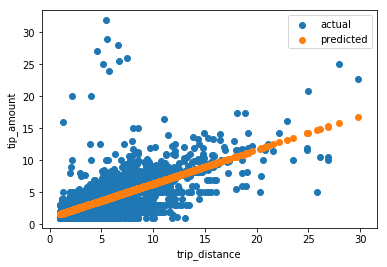

In [9]:
X_test = X_values[int(.7*len(X_values)):]
Y_test = Y_values[int(.7*len(Y_values)):]
print len(X_test)
print len(X_values)
Y_predicted = regrA.predict(X_test)
#Y_res = (Y_predicted - Y_taxiData)
#sns.regplot(np.reshape(X_,len(Y_predicted)), np.reshape(Y_res,len(Y_res)), color="g")

plt.scatter(X_test, Y_test, label = 'actual')
plt.scatter(X_test,Y_predicted, label = 'predicted')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()
plt.show()

In [6]:
def SSE(Y_actual, Y_predicted):
    return sum((Y_predicted - Y_actual)**2)/len(Y_predicted)
def MAPE(Y_actual, Y_predicted):
    return (100.0/len(Y_actual))* sum(abs((Y_predicted-Y_actual)/(Y_actual)))

In [10]:
print "MAPE: " ,MAPE(Y_test, Y_predicted)
print "SSE: "  ,SSE(Y_test, Y_predicted)

MAPE:  [36.58384895]
SSE:  [2.94482263]


# Intercept true

In [11]:
regrA = linear_model.LinearRegression(fit_intercept=True)
#X_taxiData = taxiData[['trip_distance']].values
#Y_taxiData = taxiData['total_amount'].values
#X_taxiData = X_taxiData.reshape(len(taxiData),1)
#Y_taxiData = Y_taxiData.reshape(len(taxiData),1)
Y_column = 'total_amount'
X_column = 'trip_distance'
X_values = []
Y_values = []
for i in range(len(taxiData)):
    if int(taxiData.loc[i][[X_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) > 0 and int(taxiData.loc[i][[Y_column]]) < 150:
        X_values.append(taxiData.loc[i][[X_column]])
        Y_values.append(taxiData.loc[i][[Y_column]])

In [21]:
regrA = linear_model.LinearRegression(fit_intercept=True)
print "regression started"
regrA.fit(X_values[:int(.7*len(X_values))],Y_values[:int(.7*len(X_values))])
print "regression coefficients: ", str(regrA.coef_)

regression started
regression coefficients:  [[3.19379263]]


14974
49911


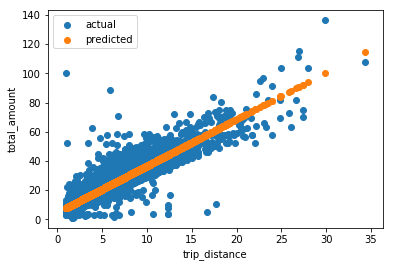

In [22]:
X_test = X_values[int(.7*len(X_values)):]
Y_test = Y_values[int(.7*len(Y_values)):]
print len(X_test)
print len(X_values)
Y_predicted = regrA.predict(X_test)
#Y_res = (Y_predicted - Y_taxiData)
#sns.regplot(np.reshape(X_,len(Y_predicted)), np.reshape(Y_res,len(Y_res)), color="g")

plt.scatter(X_test, Y_test, label = 'actual')
plt.scatter(X_test,Y_predicted, label = 'predicted')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()
plt.savefig('Regression tip vs distance.png')
plt.show()

In [23]:
print "MAPE: " ,MAPE(Y_test, Y_predicted)
print "SSE: "  ,SSE(Y_test, Y_predicted)

MAPE:  [14.55318906]
SSE:  [14.2295664]
